## CHAPTER #2 - HANDLING DATA 

## Importing dependencies 

In [1]:
# Importing necessary packages 
%pip install pandas 
%pip install numpy
%pip install matplotlib
%pip install scikitlearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

## FINANCE DATA 
The following datasets provide metrics partitioned by market capitalization, price, volatility, and turnover. The stock market activity metrics are partitioned by decile and the ETP metrics by quartile. 

I want to look into how cancellation rate (cancel to trade) is affected by stock volatility.  
I will look at different deciles  (the market capitilsation of 10 businesses) and the Market cap decile column as well as its Volatility to see how cancellation rate changes with volatility.   

**Hypothesis**- I would hypothesise that the greater the volaitilty the greater the rate of cancellation. 

In our data schema the following are defined:  
**Market Cap  Decile(n)** - what is the decile_cancel_to_trade (number of cancelled trades/ number of successful trades) for that capitalisation at that date. 
-  will be renamed to "Cancellation rate".    
                        

**Volatility Decile(n)** - the amount of statistical variation within each stock decile (e.g decile 9) as that date. 
- will be renamed to "Volatility"

## Can we predict the the cancelllation rate of a stock based on its volatility?
We will use linear regression to find out.

In [3]:
decile_path= "/Users/admin/Desktop/Data Science Career /Python/Python Projects/Linear regression from scratch /decile_quartile_2025_q1/decile_cancel_to_trade_stock.csv"
#Saving path name as variable for read csv argument 

In [4]:
decile_to_cancel_raw=pd.read_csv(decile_path) #importing file as a pandas dataframe

In [5]:
decile_to_cancel_raw.head()
decile_to_cancel_raw.tail()                   #insight into what our data looks like 

,Date,Market Cap Decile1,Market Cap Decile2,Market Cap Decile3,Market Cap Decile4,Market Cap Decile5,Market Cap Decile6,Market Cap Decile7,Market Cap Decile8,Market Cap Decile9,...,Volatility Decile1,Volatility Decile2,Volatility Decile3,Volatility Decile4,Volatility Decile5,Volatility Decile6,Volatility Decile7,Volatility Decile8,Volatility Decile9,Volatility Decile10
3324,20250325,4.783326,14.888196,11.480323,14.764069,13.289801,13.306751,14.715284,12.966304,13.312258,...,16.097937,14.899900,14.584242,13.637641,13.270905,13.167269,13.986714,15.655261,14.105550,8.213032
3325,20250326,5.106118,10.530869,12.197545,14.065950,15.047847,14.448051,14.025409,14.353923,13.332430,...,15.019312,17.710920,15.620423,14.403542,14.189633,13.421478,15.079622,15.078236,12.518201,9.636699
3326,20250327,7.089191,15.782369,13.707288,15.309875,14.922006,14.986312,14.524957,15.303156,13.520445,...,15.532377,19.344706,16.799637,15.102637,15.171968,16.571692,17.609908,15.136186,12.695789,9.656315
3327,20250328,8.275332,16.547263,15.166903,13.274519,12.987643,14.276489,13.892388,14.049159,13.132417,...,14.582418,15.866909,16.649116,15.451931,14.937964,13.592484,13.377871,15.049390,13.396443,8.754059
3328,20250331,6.240361,14.713077,13.977764,14.859990,13.801839,14.690900,14.786897,15.316040,14.604102,...,14.901219,16.202915,18.884911,16.168056,16.626016,15.896119,15.149800,18.141270,13.981444,9.983689


## EXPLORATORY DATA ANALYSIS AND DATA PRE-PROCESSING


I will utilise exploratory data analysis (EDA) to identify which decile has the most linear pattern in order to utilise my linear regression model.  
This is to isolate only volatility and cancellation features for one set of independent and dependent variables. 

### ASSUMPTIONS OF LINEAR REGRESSION
Let us investigate decile_1 to see if it is a good candidate to be modelled by linear regression. 
For this to be true, there must be:
1) Strong negative or positive correlation
2) Linearity in the data points
3) Strong homoscedacity (data points maintian similar deviation throughtout all values of the independent variable)
4) Normality of errors

#### Decile 1 and Linear Regression

In [6]:
#Extracting features of market cap decile 1 
#independent variable = volatility decile1 (deviation in the stock prices  in this decile for each date)
#dependent varaible = market cap decile1 (the cancel to trade of stock each date for groups of 10 businesses in the lowest market capitalisation)
decile_1 = decile_to_cancel_raw[["Market Cap Decile1","Volatility Decile1"]] 

In [7]:
decile_1.head() #what does our data look like

,Market Cap Decile1,Volatility Decile1
0,19.370006,22.905618
1,12.398751,23.468396
2,14.483334,23.116781
3,16.220823,25.298018
4,20.941537,26.421091


In [8]:
help(decile_1.rename) #help on how to rename columns 

Help on method rename in module pandas.core.frame:

rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'IgnoreRaise' = 'ignore'
) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.

    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.

    See the :ref:`user guide <basics.rename>` for more.

    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternativ

In [9]:
decile_1 = decile_1.rename(columns={'Market Cap Decile1':'Cancellation rate','Volatility Decile1':'Volatility'})
#renaming columns since we know we are in decile 1 of the decile_cancel_to_trade file

## Does decile 1 fit our assumptions?
Let us see if our data for decile 1 fits our assumptions.    
To test this, I will make a basic plot of the two features.

### Linearity
Plot our indepdent variable vs depedent variable as a scatterplot 

In [10]:
x_1= decile_1[['Cancellation rate']] #assigning columns to the variable x
y_1 = decile_1[['Volatility']]        #assigning columns to the variable y

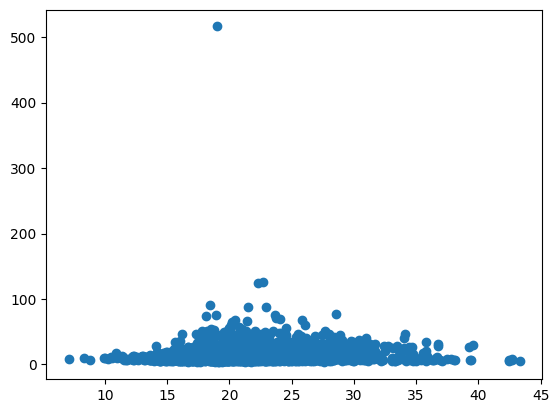

In [11]:
plot_linear = plt.scatter(y_1, x_1) #scatter plot of our two features for deile 1

From this plot we can see a few key details, namely: 
1) Our data has a few outliers.  
2) Our data does follow a linear relationship with most values condensed around the centre point of the volatility scale.  
3) The linearity is present but does not have a strong gradient meaning the volatility in decile 1 does not have much predictive power in regards to the cancellation rate. I will explore  different features for this model i.e different deciles. 

#### Decile 9 and Linear Regression

In [12]:
#Extracting features of market cap decile 1 
decile_9 = decile_to_cancel_raw[["Market Cap Decile9","Volatility Decile9"]] 

In [13]:
y_2 = decile_9[['Market Cap Decile9']] #assigning columns to the variable x
x_2 = decile_9[['Volatility Decile9']] #assigning columns to the variable x

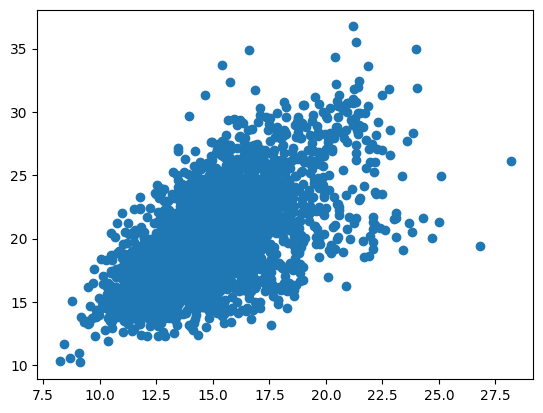

In [14]:
plot_linear = plt.scatter(x_2, y_2) #scatter plot of our two features for decile 9

From this plot we can see that:
1) There is a strong positive linear relationship, therefore volatililty does have predictive power for cancellation rates. 
2) There is heteroscedacity in the raw data, therefore we may need to apply some kind of transformation to the data but I will make the regression model and then check for homoscedacity in the residuals. 
3) Interetsing though since this high heteroscedcaity indicates that as stock get more volatile purchasing decisions become more extreme. 

In [15]:
decile_9 = decile_9.rename(columns={'Market Cap Decile9':'Cancellation rate','Volatility Decile9':'Volatility'})
#renaming columns since we know we are in decile 9 of the cancel_to_trade file

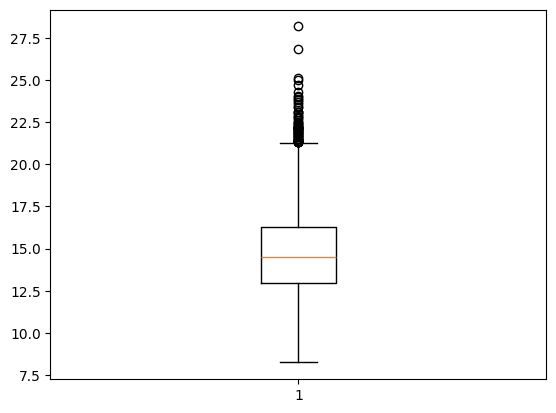

In [16]:
plot_box = plt.boxplot(x_2) #creating a boxplot of our independent variable

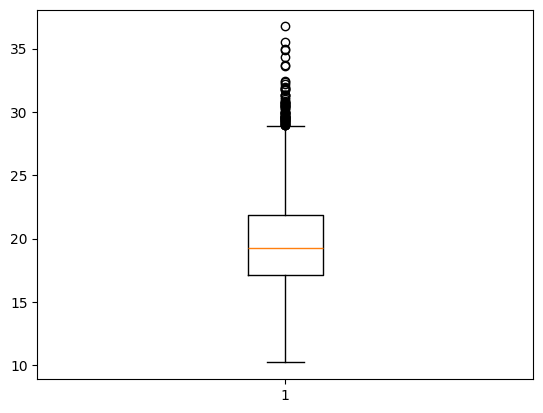

In [17]:
plot_box = plt.boxplot(y_2) #creating a boxplot of our dependent variable

From these plots we can see the presence of:
1) A significant number of outliers outside the maximum range of the dataset.
2) We will use the interquartile range method to impute these values.

## OUTLIER REMOVAL 
I will use the method of removing values above using upper and lower bounds based on quartiles. 

In [18]:
#Step 1- compute Q1 and Q3
#Cancellation rates 
Q1C = decile_9['Cancellation rate'].quantile(0.25) #quartile 1 of cancellation rates 
Q3C = decile_9['Cancellation rate'].quantile(0.75) ##quartile 3 of cancellation rates 
print(Q1C)
print(Q3C)




17.11805759573333
21.84262918006664


In [19]:
#Volatiltiy 
Q1V = decile_9['Volatility'].quantile(0.25)         #quartile 1 of volatility  
Q3V = decile_9['Volatility'].quantile(0.75)         #quartile 3 of volatility  
print(Q1V)
print(Q3V)

12.963150582121884
16.28787304647947


In [ ]:
#Step 2 - Compute IQR
#Cancellation rate 
IQRC = Q3C - Q1C
print(IQRC)

NameError: name 'IQR' is not defined

In [ ]:
#Volatility 
IQRV= Q3V -Q1V
print(IQRV)

In [ ]:
#Step 3 - Find the upper bound and lower bound
#Cancellation rate
upper_b_Canc = Q3C + 1.5*IQRC
print(upper_b_Canc)

In [ ]:
#Volatility 
upper_b_Vol = Q3V + 1.5*IQRV
print(upper_b_Vol)

In [ ]:
#Number of outliers - https://www.analyticsvidhya.com/blog/2022/09/dealing-with-outliers-using-the-iqr-method/
#Cancellation rate
decile_9[decile_9['Cancellation rate'] > upper_b_Canc].count()
print((70/3329)*100) #percentage of values to impute. Is not excessive ≈ 2%

In [ ]:
#Volatility
decile_9[decile_9['Volatility'] > upper_b_Vol].count()
print((69/3329)*100) #percentage of values to impute. Is not excessive ≈ 2%

### WINSORISATION 
A method of dealing with systematic outliers to maintain distribution of data. 

Through our EDA, I learned that our outliers are only present in  the upper tail , truncating them would remove information from the data and make our model have 
lower predictive power at the high end.   
Therefore I will use Winsorisation to cap them  to the max of Q3 + 1.5*IQR - https://www.datacamp.com/tutorial/winsorized-mean

In [ ]:

#Cancellation rate 
decile_9['Cancellation rate'] = decile_9['Cancellation rate'].clip (upper = upper_b_Canc) #winsorising cancellation rate 
decile_9[decile_9['Cancellation rate'] > upper_b_Canc].count()  


In [ ]:
#Volatility
decile_9['Volatility'] = decile_9['Volatility'].clip (upper = upper_b_Vol)                 #winsorising volatility  
decile_9[decile_9['Volatility'] > upper_b_Vol].count()  

In [ ]:
# New  values of x and y with Winsoration 
y_3 = decile_9[['Cancellation rate']]
x_3 = decile_9[['Volatility']]

In [ ]:
plt.boxplot(x_3) #New boxplot of cancellation rate with Winsorisation

In [ ]:
plt.boxplot(y_3) #New boxplot of volatility with Winsorisation

In [ ]:
plt.hist(x_3)   #New histogram of Cancellation rate with Winsorisation

In [ ]:
plt.hist(y_3)   #New boxplot of Volatility with Winsorisation

Now that we have the pre-processed data with linearity and outliers handled we can  use our linear regression model.